In [18]:
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(6,2)}, 
    #style="white" # nicer layout
)

## Coherence Values NMF VS LDA Mallet

In [5]:
start=40
step=5
limit=150 # not included

In [7]:
nmf_coherence = pd.read_csv('../../data/feature_extraction/feature_extraction/nmf/nmf_coherence_values_{}_{}.csv'.format(start, limit))
malletlda_coherence = pd.read_csv('../../data/feature_extraction/feature_extraction/ldamallet/ldamallet_coherence_values_{}_{}.csv'.format(start, limit))


#nmf_coherence = nmf_coherence[(nmf_coherence['Number of Topics'] >= 50) & (nmf_coherence['Number of Topics'] <= 165)]
#malletlda_coherence = malletlda_coherence[(malletlda_coherence['Number of Topics'] >= 50) & 
#                                          (malletlda_coherence['Number of Topics'] <= 165)]


nmf_coherence.drop('Unnamed: 0', axis=1, inplace=True)
nmf_coherence.set_index('Number of Topics', inplace=True)

malletlda_coherence.drop('Unnamed: 0', axis=1, inplace=True)
malletlda_coherence.set_index('Number of Topics', inplace=True)


In [8]:
coherence = nmf_coherence.join(malletlda_coherence,how='inner', lsuffix=' NMF', rsuffix = ' LDA Mallet' )
coherence.reset_index(inplace=True)
coherence.rename(columns={'Coherence Value NMF': 'NMF', 'Coherence Value LDA Mallet':'LDA Mallet'}, inplace=True)
melt = pd.melt(coherence, ['Number of Topics'])
melt.head()
melt.rename(columns={'variable': 'Topic Modelling Algorithm', 'value':'Coherence Value'}, inplace=True)


In [82]:
print(round(coherence['LDA Mallet'].values.max(), 2))
print(round(coherence['LDA Mallet'].values.min(), 2))

print(round(coherence['NMF'].values.max(), 2))
print(round(coherence['NMF'].values.min(), 2))

0.56
0.52
0.44
0.37


No handles with labels found to put in legend.


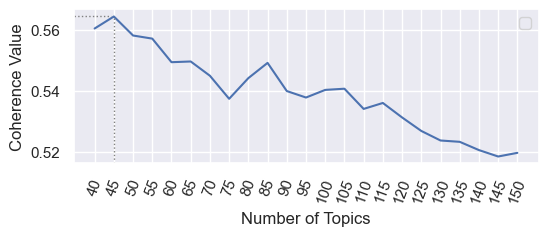

In [19]:
#sns.lineplot(x="Number of Topics", y="Coherence Value NMF", data=coherence)
ax_c=sns.lineplot(x='Number of Topics', y='Coherence Value', 
             data=malletlda_coherence, markers=True, dashes=False, 
             palette=sns.color_palette("mako_r", 2),
            sort = False)


#plt.axvline(55, 0, coherence['LDA Mallet'].values.max())
plt.axvline(45, 0,0.95, linewidth=1, color='grey', linestyle=':')
#plt.axhline(coherence['NMF'].values.max(), 0,0.05,linewidth=1, color='grey', linestyle=':')

#plt.axvline(30, 0,0.95, linewidth=1, color='grey', linestyle=':')

#plt.axvline(40, 0,0.35, linewidth=1, color='grey', linestyle=':')
plt.axhline(coherence['LDA Mallet'].values.max(), 0, 0.08,linewidth=1, color='grey', linestyle=':')
#plt.axhline(coherence['NMF'].values.max(), 0,0.05,linewidth=1, color='grey', linestyle=':')

plt.xticks(coherence['Number of Topics'].values)
plt.xticks(rotation=70)
handles, labels = ax_c.get_legend_handles_labels()
plt.legend(handles=handles[1:3], labels=labels[1:3])

#plt.axhline(coherence['LDA Mallet'].values.max(), 0, 30)
plt.show()


In [9]:
#sns.lineplot(x="Number of Topics", y="Coherence Value NMF", data=coherence)
ax_c=sns.lineplot(x='Number of Topics', y='Coherence Value', hue='Topic Modelling Algorithm', 
             data=melt, markers=True, dashes=False, style="Topic Modelling Algorithm", 
             palette=sns.color_palette("mako_r", 2),
            sort = False)


#plt.axvline(55, 0, coherence['LDA Mallet'].values.max())
plt.axvline(45, 0,0.95, linewidth=1, color='grey', linestyle=':')
#plt.axhline(coherence['NMF'].values.max(), 0,0.05,linewidth=1, color='grey', linestyle=':')

#plt.axvline(30, 0,0.95, linewidth=1, color='grey', linestyle=':')

#plt.axvline(40, 0,0.35, linewidth=1, color='grey', linestyle=':')
plt.axhline(coherence['LDA Mallet'].values.max(), 0, 0.08,linewidth=1, color='grey', linestyle=':')
#plt.axhline(coherence['NMF'].values.max(), 0,0.05,linewidth=1, color='grey', linestyle=':')

plt.xticks(coherence['Number of Topics'].values)

handles, labels = ax_c.get_legend_handles_labels()
plt.legend(handles=handles[1:3], labels=labels[1:3])

#plt.axhline(coherence['LDA Mallet'].values.max(), 0, 30)
plt.show()


ValueError: Could not interpret value `Topic Modelling Algorithm` for parameter `hue`

## Topics Distribution

In [74]:
n = 45#105#75#50

In [8]:
### Helpers
def cut_keywords(row):
    all_keywords = row['Topic Keywords']
    if all_keywords != 'No Topic':
        arr = [x.strip() for x in all_keywords.split(',') if x.strip()!='_'][:3]
        
        row['Topic Keywords'] = ', '.join(arr)
    return row

def get_topics_counts(df):
    df['Topic_Keywords'].fillna('No Topic', inplace=True)
    topic_dstr = df['Topic_Keywords'].value_counts().to_frame().reset_index()
    topic_dstr.rename(columns = {'index': 'Topic Keywords', 'Topic_Keywords': '# of Readme'},
                      inplace=True)

    topic_dstr.sort_values(by=['# of Readme'], 
                           inplace=True, ascending=False)
    topic_dstr = topic_dstr.apply(cut_keywords, axis=1)
    return topic_dstr[0:20]

In [13]:
nmf_dstr = pd.read_csv('../../data/feature_extraction/feature_extraction/nmf/nmf_topics_distribution_{}.csv'.format(40))
nmf_dstr.drop('Unnamed: 0', axis=1, inplace=True)
nmf_dstr['Topic_Keywords'].fillna('No Topic', inplace=True)
nmf_topic_dstr = get_topics_counts(nmf_dstr)


lda_dstr = pd.read_csv('../../data/feature_extraction/feature_extraction/ldamallet/ldamallet_topics_distribution_{}.csv'.format(45))
lda_dstr.drop('Unnamed: 0', axis=1, inplace=True)
lda_dstr['Topic_Keywords'].fillna('No Topic', inplace=True)
lda_topic_dstr = get_topics_counts(lda_dstr)



nmf_topic_dstr

,Topic Keywords,# of Readme
0,"module, python, function",1291
1,"file, script, git",1023
2,"device, support, base",760
3,"code, repository, source",678
4,"object, task, database",650
5,"line, command, tool",580
6,"model, learning, deep",536
7,"api, service, test",529
8,"server, web, client",416
9,"training, train, model",403


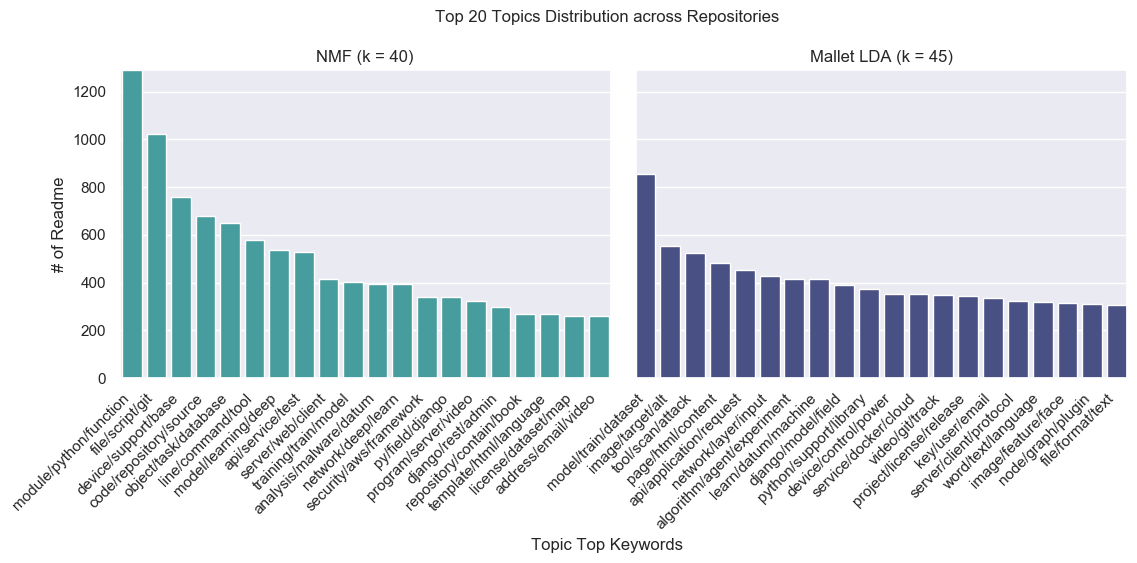

In [78]:
#sns.set_color_codes(sns.color_palette("mako_r", 2))
#plt.res
#fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False )

sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(9,4)}, 
    #style="white" # nicer layout
)
f, (ax1, ax2)= plt.subplots(1, 2, sharex=False, sharey=True, figsize=(13,4
                                                                     ))


f.add_subplot(ax1)
sns.barplot("Topic Keywords", y="# of Readme", data=nmf_topic_dstr, 
                color=sns.color_palette("mako_r", 2)[0])
plt.gca().set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
plt.gca().set_title('NMF (k = 40)')
plt.gca().set_xlabel('')


f.add_subplot(ax2)
ax2= sns.barplot("Topic Keywords", y="# of Readme", 
                 data=lda_topic_dstr,
                 color=sns.color_palette("mako_r", 2)[1])
plt.gca().set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

#fig.add_subplot(axes[1])
plt.gca().set_title('Mallet LDA (k = 45)')

#plt.setp([ax1, ax2])
#plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.margins(x=0, y=0)
f.text(0.5, -0.32, 'Topic Top Keywords', ha='center')
f.text(0.5, 1, 'Top 20 Topics Distribution across Repositories', ha='center')

plt.show()